# library

In [2]:
import tabint
from tabint.dataset import *
from tabint.pre_processing import *
from tabint.learner import *
from tabint.feature import *
from tabint.interpretation import *

# read data

In [3]:
#data.to_pickle('telco.pkl')
data = pd.read_pickle('telco.pkl')

# EDA

In [27]:
data.head()

,ID,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,...,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5,churn
0,2285899345,349688.56,400264.96,366640.87,464489.95,387936.79,364476.79,559.0,682.0,601.0,...,242.0,198.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2293856355,195987.11,224965.55,182741.57,206699.93,180660.21,183674.34,712.0,857.0,374.0,...,336.0,169.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2290588355,316340.62,322837.18,248428.44,240993.57,224259.06,207918.73,2021.0,1773.0,1205.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2216952365,181012.38,175681.86,233540.52,155115.52,152377.36,156420.10,290.0,246.0,252.0,...,25.0,33.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2221641375,334968.69,434120.10,253201.41,199496.40,126333.27,102412.77,1671.0,1717.0,1255.0,...,169.0,275.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [36]:
data.shape

(919361, 153)

In [35]:
data.head()

,ID,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,...,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5,churn
0,2285899345,349688.56,400264.96,366640.87,464489.95,387936.79,364476.79,559.0,682.0,601.0,...,242.0,198.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2293856355,195987.11,224965.55,182741.57,206699.93,180660.21,183674.34,712.0,857.0,374.0,...,336.0,169.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2290588355,316340.62,322837.18,248428.44,240993.57,224259.06,207918.73,2021.0,1773.0,1205.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2216952365,181012.38,175681.86,233540.52,155115.52,152377.36,156420.10,290.0,246.0,252.0,...,25.0,33.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2221641375,334968.69,434120.10,253201.41,199496.40,126333.27,102412.77,1671.0,1717.0,1255.0,...,169.0,275.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
data.customer_age.unique() #hmm

array([35, 32, 39, 37, 38, 36, 33, 34, 40, 30, 31])

In [7]:
mss = Missing.from_df(data)

no missing data


In [7]:
bnw = BoxnWhisker.from_df(data, ['sum_total_A s_tn', 'sum_total_A s_tn_1', 'sum_total_A s_tn_2'])

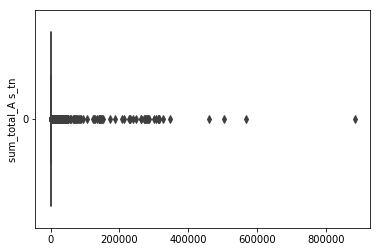

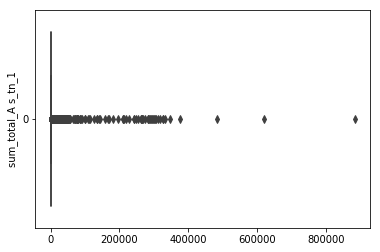

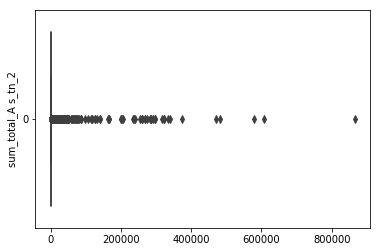

In [10]:
bnw.plot()

# pre processing

In [4]:
df = data[:50000]

In [5]:
df, y, pp_outp = tabular_proc(df, 'churn', [fill_na(), app_cat(), dummies()])

In [6]:
ds = TBDataset.from_SKSplit(df, y, pp_outp['cons'], pp_outp['cats'])

# first fit 

In [4]:
learner = LGBLearner()
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':2000,
    'learning_rate':0.08,
    'num_leaves':20,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.2,
    'reg_lambda':.2,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    #'is_unbalance': 'true',
    'metric':'binary_logloss'}

In [10]:
learner.fit(params, *ds.trn, *ds.val, save = True)

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0844342	valid_1's binary_logloss: 0.0875446
[200]	training's binary_logloss: 0.0590654	valid_1's binary_logloss: 0.073351
[300]	training's binary_logloss: 0.0486453	valid_1's binary_logloss: 0.0724642
[400]	training's binary_logloss: 0.0413544	valid_1's binary_logloss: 0.0727055
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0482968	valid_1's binary_logloss: 0.072428


In [11]:
roc = ReceiverOperatingCharacteristic.from_learner(learner, *ds.val)

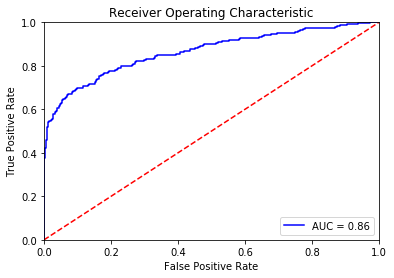

In [12]:
roc.plot()

In [13]:
kde = KernelDensityEstimation.from_learner(learner, *ds.val)

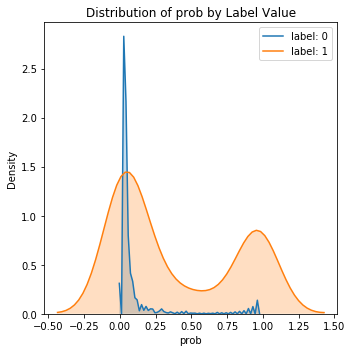

In [14]:
kde.plot()

# feature correlation

In [15]:
ddg = Dendogram.from_df(ds.x_trn)

/home/zero/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/zero/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/zero/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/zero/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/zero/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


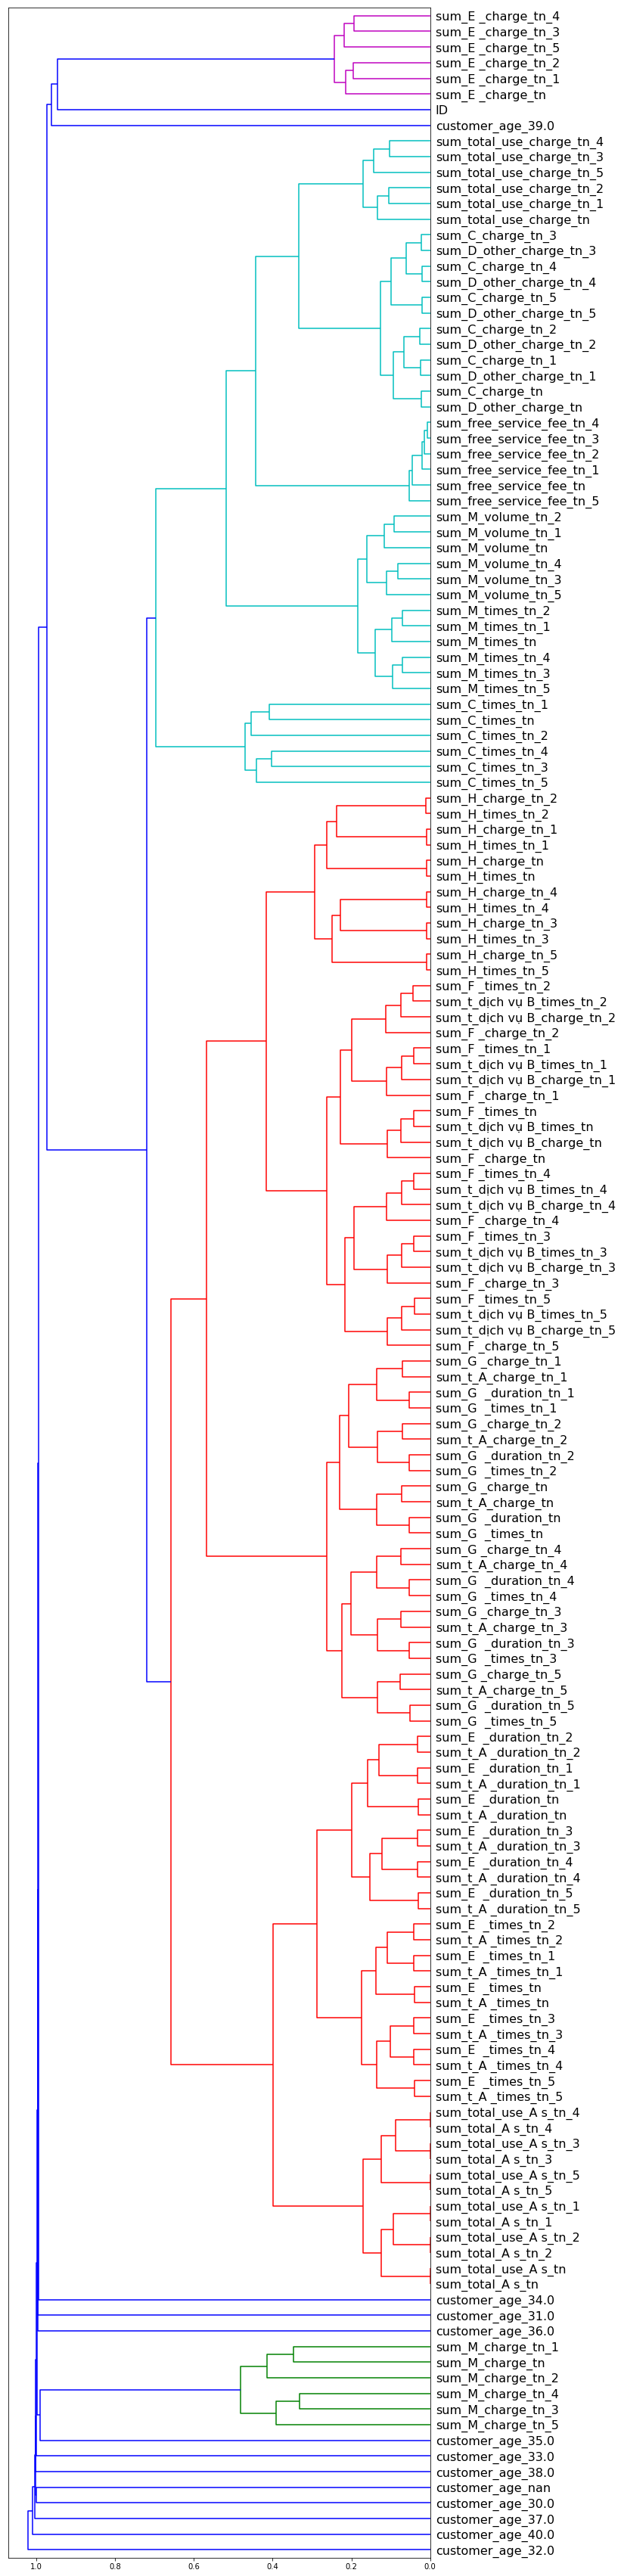

In [16]:
ddg.plot()

In [17]:
group_cols = [['sum_E _charge_tn', 'sum_E _charge_tn_1', 'sum_E _charge_tn_2', 'sum_E _charge_tn_3', 'sum_E _charge_tn_4', 'sum_E _charge_tn_5'],
             ['sum_total_use_charge_tn', 'sum_total_use_charge_tn_1', 'sum_total_use_charge_tn_2', 'sum_total_use_charge_tn_3', 'sum_total_use_charge_tn_4',  'sum_total_use_charge_tn_5'],
             ['sum_D_other_charge_tn', 'sum_D_other_charge_tn_1', 'sum_D_other_charge_tn_2', 'sum_D_other_charge_tn_3', 'sum_D_other_charge_tn_4', 'sum_D_other_charge_tn_5',
             'sum_C_charge_tn', 'sum_C_charge_tn_1', 'sum_C_charge_tn_2', 'sum_C_charge_tn_3', 'sum_C_charge_tn_4','sum_C_charge_tn_5'],
             ['sum_free_service_fee_tn', 'sum_free_service_fee_tn_1', 'sum_free_service_fee_tn_2',  'sum_free_service_fee_tn_3',  'sum_free_service_fee_tn_4',  'sum_free_service_fee_tn_5'],
             ['sum_M_volume_tn', 'sum_M_volume_tn_1', 'sum_M_volume_tn_2', 'sum_M_volume_tn_3', 'sum_M_volume_tn_4', 'sum_M_volume_tn_5'],
             ['sum_M_times_tn', 'sum_M_times_tn_1', 'sum_M_times_tn_2',  'sum_M_times_tn_3',  'sum_M_times_tn_4',  'sum_M_times_tn_5'],
             ['sum_C_times_tn', 'sum_C_times_tn_1', 'sum_C_times_tn_2', 'sum_C_times_tn_3', 'sum_C_times_tn_4', 'sum_C_times_tn_5'],
             ['sum_H_times_tn', 'sum_H_times_tn_1', 'sum_H_times_tn_2', 'sum_H_times_tn_3', 'sum_H_times_tn_4', 'sum_H_times_tn_5',
             'sum_H_charge_tn', 'sum_H_charge_tn_1', 'sum_H_charge_tn_2', 'sum_H_charge_tn_3', 'sum_H_charge_tn_4', 'sum_H_charge_tn_5'],
             ['sum_t_dịch vụ B_charge_tn', 'sum_t_dịch vụ B_charge_tn_1', 'sum_t_dịch vụ B_charge_tn_2', 'sum_t_dịch vụ B_charge_tn_3', 'sum_t_dịch vụ B_charge_tn_4', 'sum_t_dịch vụ B_charge_tn_5',
             'sum_t_dịch vụ B_times_tn', 'sum_t_dịch vụ B_times_tn_1', 'sum_t_dịch vụ B_times_tn_2', 'sum_t_dịch vụ B_times_tn_3',  'sum_t_dịch vụ B_times_tn_4', 'sum_t_dịch vụ B_times_tn_5',
             'sum_F _times_tn', 'sum_F _times_tn_1', 'sum_F _times_tn_2', 'sum_F _times_tn_3', 'sum_F _times_tn_4', 'sum_F _times_tn_5',
             'sum_F _charge_tn', 'sum_F _charge_tn_1', 'sum_F _charge_tn_2', 'sum_F _charge_tn_3', 'sum_F _charge_tn_4', 'sum_F _charge_tn_5'],
             ['sum_t_A_charge_tn', 'sum_t_A_charge_tn_1', 'sum_t_A_charge_tn_2', 'sum_t_A_charge_tn_3', 'sum_t_A_charge_tn_4', 'sum_t_A_charge_tn_5',
             'sum_G _charge_tn', 'sum_G _charge_tn_1', 'sum_G _charge_tn_2', 'sum_G _charge_tn_3', 'sum_G _charge_tn_4', 'sum_G _charge_tn_5',
             'sum_G  _times_tn', 'sum_G  _times_tn_1', 'sum_G  _times_tn_2', 'sum_G  _times_tn_3', 'sum_G  _times_tn_4', 'sum_G  _times_tn_5',
             'sum_G  _duration_tn', 'sum_G  _duration_tn_1', 'sum_G  _duration_tn_2', 'sum_G  _duration_tn_3', 'sum_G  _duration_tn_4', 'sum_G  _duration_tn_5'],
             ['sum_t_A _duration_tn', 'sum_t_A _duration_tn_1', 'sum_t_A _duration_tn_2', 'sum_t_A _duration_tn_3', 'sum_t_A _duration_tn_4', 'sum_t_A _duration_tn_5',
             'sum_E  _duration_tn', 'sum_E  _duration_tn_1', 'sum_E  _duration_tn_2', 'sum_E  _duration_tn_3', 'sum_E  _duration_tn_4', 'sum_E  _duration_tn_5',
             'sum_t_A _times_tn', 'sum_t_A _times_tn_1', 'sum_t_A _times_tn_2', 'sum_t_A _times_tn_3', 'sum_t_A _times_tn_4', 'sum_t_A _times_tn_5',
             'sum_E  _times_tn', 'sum_E  _times_tn_1',  'sum_E  _times_tn_2',  'sum_E  _times_tn_3',  'sum_E  _times_tn_4', 'sum_E  _times_tn_5'],
              ['sum_total_A s_tn', 'sum_total_A s_tn_1', 'sum_total_A s_tn_2', 'sum_total_A s_tn_3', 'sum_total_A s_tn_4', 'sum_total_A s_tn_5',
             'sum_total_use_A s_tn', 'sum_total_use_A s_tn_1', 'sum_total_use_A s_tn_2', 'sum_total_use_A s_tn_3', 'sum_total_use_A s_tn_4', 'sum_total_use_A s_tn_5'],
              ['sum_M_charge_tn', 'sum_M_charge_tn_1', 'sum_M_charge_tn_2', 'sum_M_charge_tn_3', 'sum_M_charge_tn_4','sum_M_charge_tn_5'] ]

# feature importance

In [18]:
impt = Importance.from_Learner(learner, ds, group_cols = group_cols)

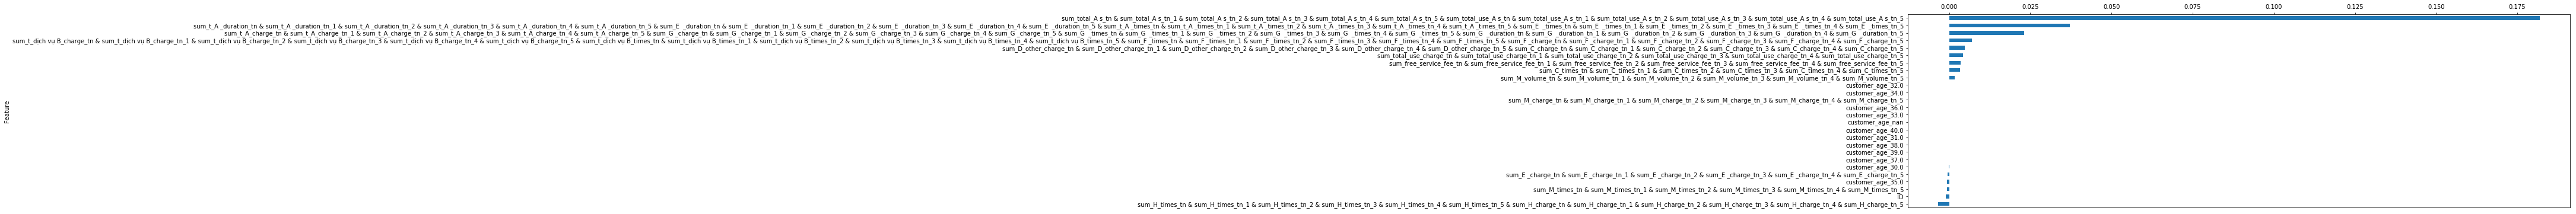

In [19]:
impt.plot()

In [22]:
top_fts = impt.top_features(8)

# fit with all data

In [5]:
df, y, pp_outp = tabular_proc(data, 'churn', [fill_na(), app_cat(), dummies()])
ds = TBDataset.from_SKSplit(df, y, pp_outp['cons'], pp_outp['cats'])

In [7]:
ds.keep(top_fts)

In [19]:
learner.fit(params, *ds.trn, *ds.val, ctn=True, fn = 'lgbmodel', save=True, early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[2100]	training's binary_logloss: 0.0521833	valid_1's binary_logloss: 0.0532528
Did not meet early stopping. Best iteration is:
[2100]	training's binary_logloss: 0.0521833	valid_1's binary_logloss: 0.0532528


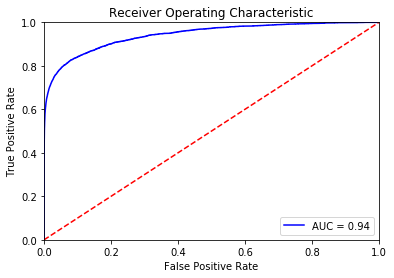

In [21]:
roc = ReceiverOperatingCharacteristic.from_learner(learner, *ds.val)
roc.plot()

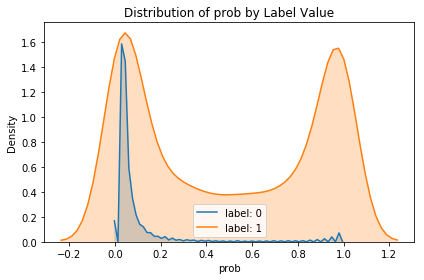

In [22]:
kde = KernelDensityEstimation.from_learner(learner, *ds.val)
kde.plot()

# shap

In [9]:
Shap = Shapley.from_Tree(learner, ds)

## force plot

### 0

In [33]:
Shap.one_force_plot(loc = 0, link = 'logit')

In [34]:
Shap.one_force_data.pos(5)

,feature,feature value,Shap value
6,sum_total_use_A s_tn,325.000000,1.311798
1,sum_total_A s_tn_1,365.000000,0.065662
107,sum_free_service_fee_tn_5,63636.363281,0.064233
108,sum_C_times_tn,1.000000,0.054843
46,sum_G _charge_tn_4,5625.000000,0.038303


In [35]:
Shap.one_force_data.neg(5)

,feature,feature value,Shap value
0,sum_total_A s_tn,356.000000,-1.384811
54,sum_G _duration_tn,5722.000000,-0.229966
83,sum_F _charge_tn_5,24000.240234,-0.070006
37,sum_t_A_charge_tn_1,0.000000,-0.061460
102,sum_free_service_fee_tn,63636.363281,-0.055134


### 1

In [17]:
pred = learner.predict(ds.x_val)

In [23]:
Shap.one_force_plot(record = ds.x_val[pred > 0.5][:1], link = 'logit')

In [29]:
Shap.one_force_data.pos(5)

,feature,feature value,Shap value
0,sum_total_A s_tn,0.0,8.963912
1,sum_total_A s_tn_1,144.0,0.522007
3,sum_total_A s_tn_3,414.0,0.304530
102,sum_free_service_fee_tn,0.0,0.292855
2,sum_total_A s_tn_2,523.0,0.289097


In [30]:
Shap.one_force_data.neg(5)

,feature,feature value,Shap value
6,sum_total_use_A s_tn,0.00,-1.956462
89,sum_D_other_charge_tn_5,63636.36,-0.103624
37,sum_t_A_charge_tn_1,0.00,-0.090718
36,sum_t_A_charge_tn,0.00,-0.057443
19,sum_E _duration_tn_1,0.00,-0.054495


## dependence plot

### sum_total_A: Tổng số lần sử dụng dịch vụ 

In [60]:
fts = ['sum_total_A s_tn', 'sum_total_A s_tn_1', 'sum_total_A s_tn_2', 'sum_total_A s_tn_3', 'sum_total_A s_tn_4', 'sum_total_A s_tn_5']

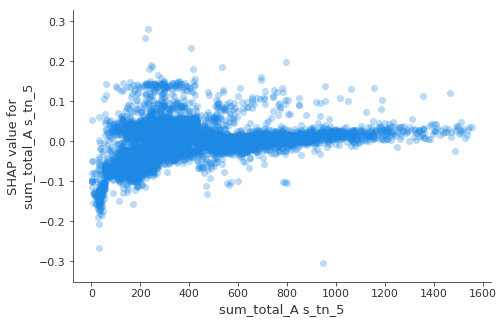

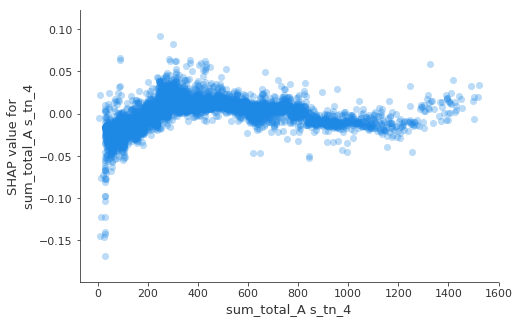

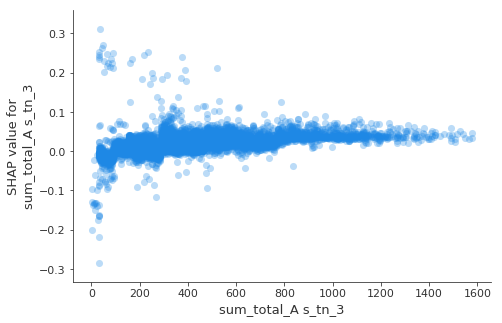

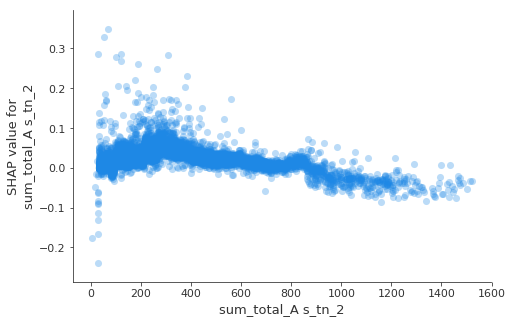

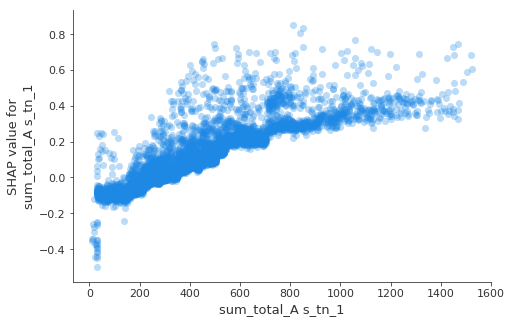

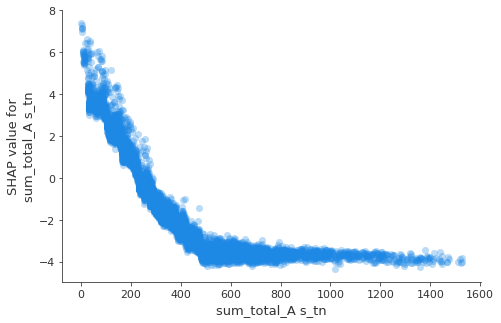

In [61]:
for f in list(reversed(fts)): Shap.dependence_plot(f, None)

In [74]:
feature = 'sum_total_A s_tn'
mask = ds.x_trn[feature] < 1600

In [76]:
kde = KernelDensityEstimation.from_series('sum_total_A s_tn', ds.x_trn[mask].values.T, ds.y_trn[mask] )

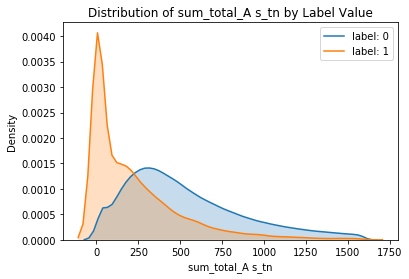

In [77]:
kde.plot()

### sum_total_use_A: Tổng số lần sử dụng dịch vụ A (có phí)

In [63]:
fts = ['sum_total_use_A s_tn', 'sum_total_use_A s_tn_1', 'sum_total_use_A s_tn_2', 'sum_total_use_A s_tn_3', 'sum_total_use_A s_tn_4', 'sum_total_use_A s_tn_5']

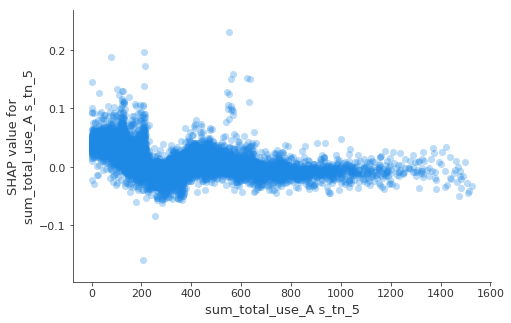

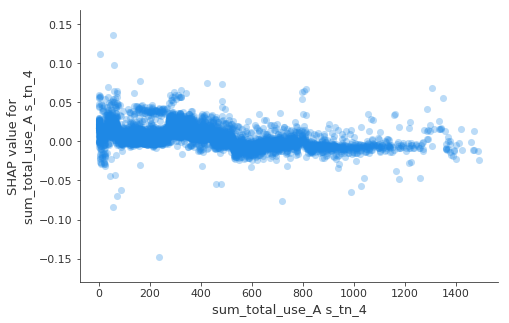

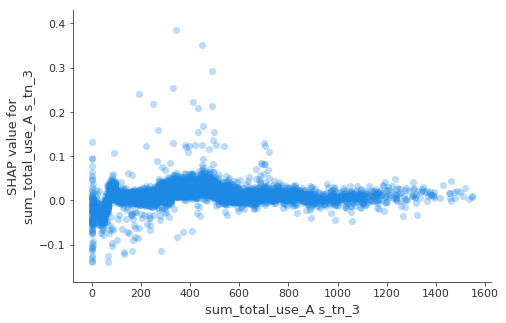

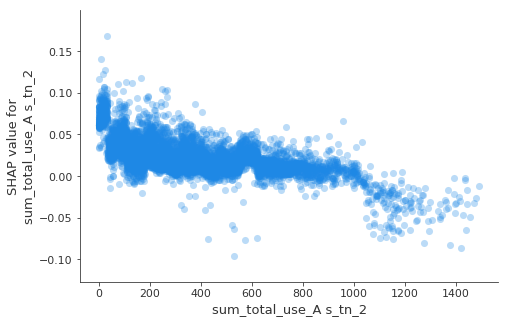

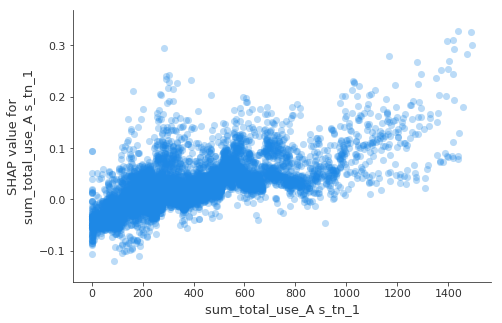

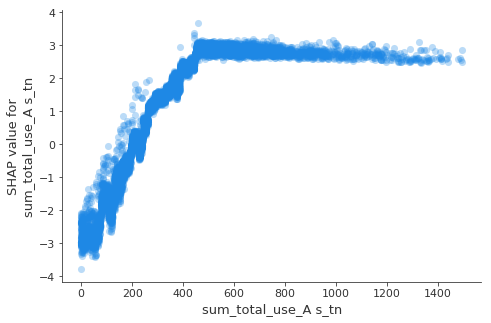

In [64]:
for f in list(reversed(fts)): Shap.dependence_plot(f, None)

### sum_t_A _times: Tổng số lần sử dụng dịch vụ A (bao gồm cả có phí vs miễn phí)

In [65]:
fts = ['sum_t_A _times_tn', 'sum_t_A _times_tn_1', 'sum_t_A _times_tn_2', 'sum_t_A _times_tn_3', 'sum_t_A _times_tn_4', 'sum_t_A _times_tn_5']

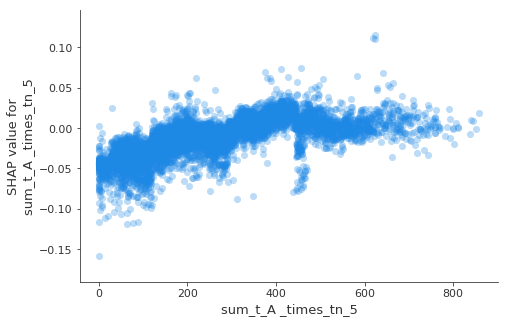

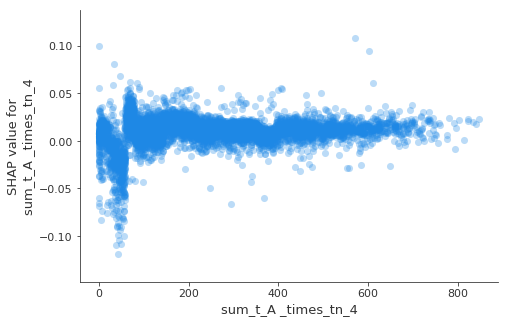

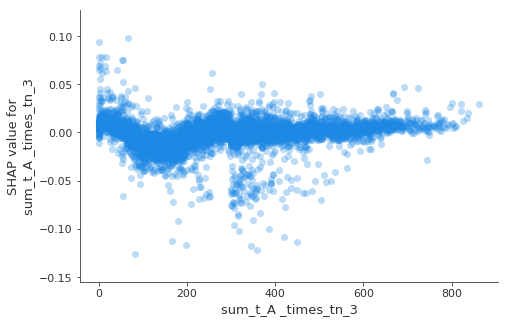

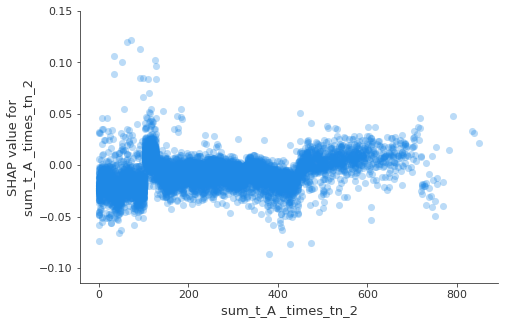

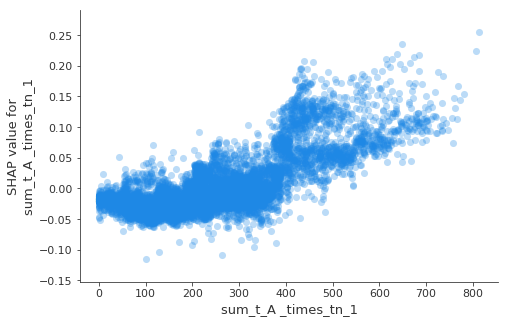

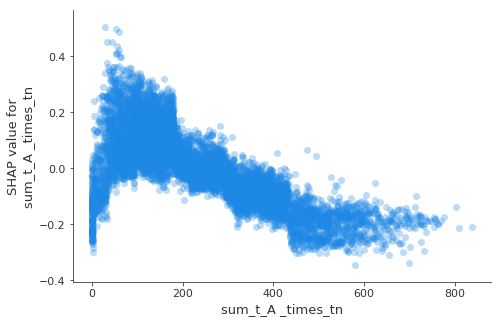

In [66]:
for f in list(reversed(fts)): Shap.dependence_plot(f, None)

### sum_t_A _duration: Tổng thời lượng sử dụng dịch vụ A

In [86]:
fts = ['sum_t_A _duration_tn','sum_t_A _duration_tn_1','sum_t_A _duration_tn_2','sum_t_A _duration_tn_3','sum_t_A _duration_tn_4','sum_t_A _duration_tn_5']

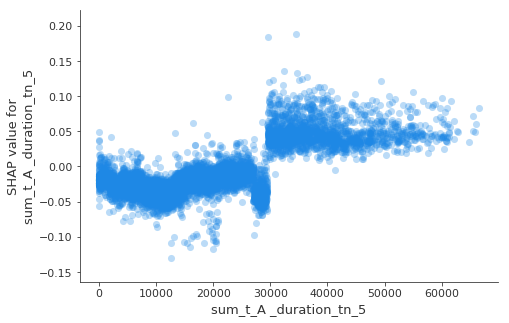

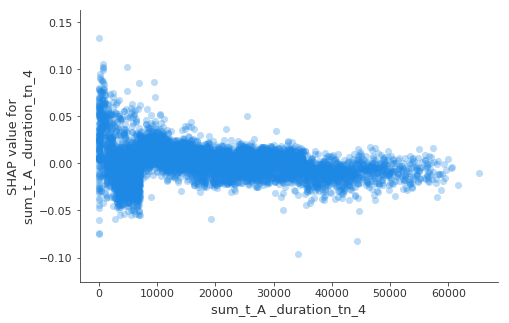

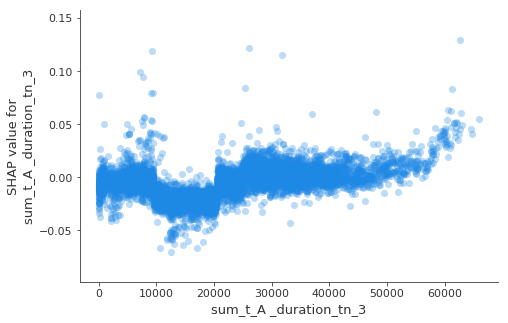

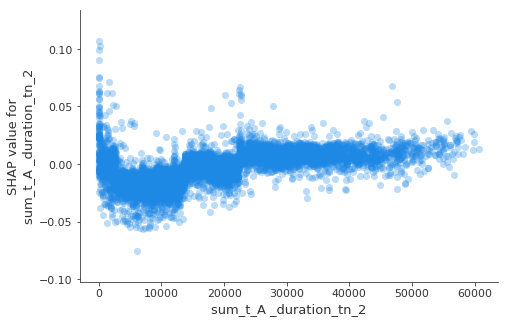

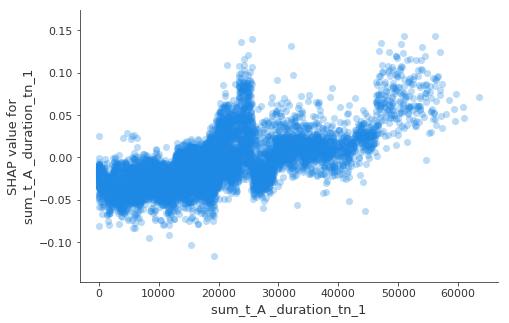

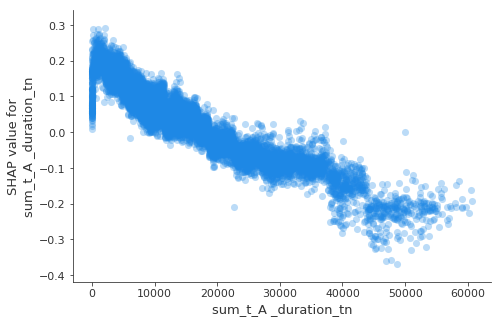

In [68]:
for f in list(reversed(fts)): Shap.dependence_plot(f, None)

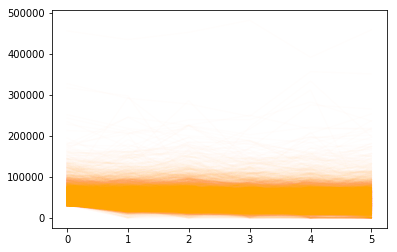

In [99]:
for i in ds.x_trn[ds.x_trn['sum_t_A _duration_tn_5'] > 30000][list(reversed(fts))].sample(10000).values:
    plt.plot(i, alpha = 0.01, color='orange')